In [140]:
import pandas as pd
from pandas import merge
import numpy as np
from matplotlib import pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

In [97]:
import glob,os
files = glob.glob('data/*.csv')

In [98]:
df = pd.concat([pd.read_csv(f).assign(f_name=os.path.basename(f).split('t_')[1].split('.')[0]) for f in files])

In [99]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df = df.rename(columns={'time':'weld_time','name':'weld_point','f_name':'robot_name'})
df.head()

weld_time  current  voltage  weld_point robot_name
0        434     8403     2059           1   TC_112_1
1        453     8380     2030           2   TC_112_1
2        453     8390     2041           3   TC_112_1
3        451     8382     2003           4   TC_112_1
4        288     8154     1524           5   TC_112_1

In [100]:
df.shape

(10022802, 5)

In [101]:
df = df[df['current']!=0]
df = df[df['voltage']!=0]

In [102]:
df.shape

(9938685, 5)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9938685 entries, 0 to 91784
Data columns (total 5 columns):
weld_time     int64
current       int64
voltage       int64
weld_point    int64
robot_name    object
dtypes: int64(4), object(1)
memory usage: 455.0+ MB


In [104]:
print(df['robot_name'].unique())

['TC_112_1' 'TC_112_2' 'TC_114_1' 'TC_115_1' 'TC_115_2' 'TC_115_3'
 'TC_117_2' 'TC_117_3' 'TC_162A_1' 'TC_162A_2' 'TC_162A_3' 'TC_162A_4'
 'TC_162A_5' 'TC_162A_6' 'TC_162B_1' 'TC_162B_2' 'TC_162B_3' 'TC_162B_4'
 'TC_162B_5' 'TC_162B_6' 'TC_303_1' 'TC_303_2' 'TC_304_1' 'TC_304_3'
 'TC_304_4' 'TC_305_1' 'TC_305_2' 'TC_305_3' 'TC_305_4' 'TC_306_1'
 'TC_306_2' 'TC_306_3' 'TC_306_4' 'TC_309_1' 'TC_309_10' 'TC_309_2'
 'TC_309_3' 'TC_309_4' 'TC_309_5' 'TC_309_6' 'TC_309_7' 'TC_309_8'
 'TC_309_9' 'TC_310_1' 'TC_310_2' 'TC_310_3' 'TC_310_4' 'TC_311_1'
 'TC_311_2' 'TC_311_3' 'TC_311_4' 'TC_312_1' 'TC_312_2' 'TC_312_3'
 'TC_312_4' 'TC_313_1' 'TC_313_2' 'TC_313_3' 'TC_313_4' 'TC_314_1'
 'TC_314_2' 'TC_314_3' 'TC_314_4' 'TC_318_1' 'TC_318_2' 'TC_318_3'
 'TC_318_4' 'TC_319_3' 'TC_319_4' 'TC_323_1' 'TC_323_2' 'TC_323_3'
 'TC_323_4' 'TC_324_1' 'TC_324_2' 'TC_324_3' 'TC_324_4' 'TC_365_1'
 'TC_LH_205_1' 'TC_LH_205_2' 'TC_LH_205_3' 'TC_LH_208_2' 'TC_LH_208_3'
 'TC_LH_209_2' 'TC_LH_209_2_1' 'TC_LH_210_1' 

In [105]:
print(df['weld_point'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [106]:
df_TC_LH_205_1 = df[df['robot_name']== 'TC_LH_205_1']
df_TC_LH_205_2 = df[df['robot_name']== 'TC_LH_205_2']
df_TC_LH_205_3 = df[df['robot_name']== 'TC_LH_205_3']
df_TC_LH_208_2 = df[df['robot_name']== 'TC_LH_208_2']
df_TC_LH_208_3 = df[df['robot_name']== 'TC_LH_208_3']
df_TC_LH_210_1 = df[df['robot_name']== 'TC_LH_210_1']
df_TC_LH_210_2 = df[df['robot_name']== 'TC_LH_210_2']
df_TC_LH_211_2 = df[df['robot_name']== 'TC_LH_211_2']

In [107]:
df_TC_LH_205_1.head()

weld_time  current  voltage  weld_point   robot_name
0        219     7430     2084           1  TC_LH_205_1
1        204     7437     2034           2  TC_LH_205_1
2        252     7669     2173           3  TC_LH_205_1
3        340     8019     1988           4  TC_LH_205_1
4        340     7745     2302           5  TC_LH_205_1

In [108]:
df_TC_LH_205_1.shape

(137688, 5)

In [109]:
robot_name = ['TC_LH_205_1','TC_LH_205_2','TC_LH_205_3','TC_LH_208_2','TC_LH_208_3',
              'TC_LH_210_1','TC_LH_210_2','TC_LH_211_2']

In [110]:
robot_name[0]

'TC_LH_205_1'

In [111]:
pd.options.mode.chained_assignment = None

df_TC_LH_205_1.loc[:,'layer'] = 0
df_TC_LH_205_2.loc[:,'layer'] = 0
df_TC_LH_205_3.loc[:,'layer'] = 0
df_TC_LH_208_2.loc[:,'layer'] = 0
df_TC_LH_208_3.loc[:,'layer'] = 0
df_TC_LH_210_1.loc[:,'layer'] = 0
df_TC_LH_210_2.loc[:,'layer'] = 0
df_TC_LH_211_2.loc[:,'layer'] = 0

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [112]:
df_TC_LH_205_1.head()

weld_time  current  voltage  weld_point   robot_name  layer
0        219     7430     2084           1  TC_LH_205_1      0
1        204     7437     2034           2  TC_LH_205_1      0
2        252     7669     2173           3  TC_LH_205_1      0
3        340     8019     1988           4  TC_LH_205_1      0
4        340     7745     2302           5  TC_LH_205_1      0

In [113]:
type(df_TC_LH_205_1['weld_point'][0])

numpy.int64

In [126]:
# # 로봇별 철판 겹수 지정1 : df_TC_LH_205_1

# for i in range(len(df_TC_LH_205_1)):
#     if df_TC_LH_205_1.iloc[i,3] >= 1 and df_TC_LH_205_1.iloc[i,3] <= 4:
#         df_TC_LH_205_1.iloc[i,5] = 2
#     elif df_TC_LH_205_1.iloc[i,3] == 5 or df_TC_LH_205_1.iloc[i,3] == 6:
#         df_TC_LH_205_1.iloc[i,5] = 3
#     elif df_TC_LH_205_1.iloc[i,3] >= 7 and df_TC_LH_205_1.iloc[i,3] <= 12:
#         df_TC_LH_205_1.iloc[i,5] = 2
#     elif df_TC_LH_205_1.iloc[i,3] >= 23 and df_TC_LH_205_1.iloc[i,3] <= 31:
#         df_TC_LH_205_1.iloc[i,5] = 2

In [127]:
# # 로봇별 철판 겹수 지정2 : df_TC_LH_205_2

# for i in range(len(df_TC_LH_205_2)):
#     if df_TC_LH_205_2.iloc[i,3] >= 1 and df_TC_LH_205_2.iloc[i,3] <= 4:
#         df_TC_LH_205_2.iloc[i,5] = 2
#     elif df_TC_LH_205_2.iloc[i,3] == 5 or df_TC_LH_205_2.iloc[i,3] == 12:
#         df_TC_LH_205_2.iloc[i,5] = 3
#     elif df_TC_LH_205_2.iloc[i,3] == 22:
#         df_TC_LH_205_2.iloc[i,5] = 3
#     elif df_TC_LH_205_2.iloc[i,3] >= 6 and df_TC_LH_205_2.iloc[i,3] <= 11:
#         df_TC_LH_205_2.iloc[i,5] = 2
#     elif df_TC_LH_205_2.iloc[i,3] >= 13 and df_TC_LH_205_2.iloc[i,3] <= 21:
#         df_TC_LH_205_2.iloc[i,5] = 2
#     elif df_TC_LH_205_2.iloc[i,3] == 23 or df_TC_LH_205_2.iloc[i,3] == 24:
#         df_TC_LH_205_2.iloc[i,5] = 2

In [116]:
# # 로봇별 철판 겹수 지정3 : df_TC_LH_205_3

# for i in range(len(df_TC_LH_205_3)):
#     if df_TC_LH_205_3.iloc[i,3] == 1:
#         df_TC_LH_205_3.iloc[i,5] = 2

In [117]:
# # 로봇별 철판 겹수 지정4 : df_TC_LH_208_2

# for i in range(len(df_TC_LH_208_2)):
#     if df_TC_LH_208_2.iloc[i,3] >= 24 and df_TC_LH_208_2.iloc[i,3] <= 29:
#         df_TC_LH_208_2.iloc[i,5] = 3
#     elif df_TC_LH_208_2.iloc[i,3] == 30:
#         df_TC_LH_208_2.iloc[i,5] = 4

In [118]:
# # 로봇별 철판 겹수 지정5 : df_TC_LH_208_3

# for i in range(len(df_TC_LH_208_3)):
#     if df_TC_LH_208_3.iloc[i,3] >= 1 and df_TC_LH_208_3.iloc[i,3] <= 8:
#         df_TC_LH_208_3.iloc[i,5] = 2    

In [119]:
# # 로봇별 철판 겹수 지정6 : df_TC_LH_210_1

# for i in range(len(df_TC_LH_210_1)):
#     if df_TC_LH_210_1.iloc[i,3] >= 25 and df_TC_LH_210_1.iloc[i,3] <= 28:
#         df_TC_LH_210_1.iloc[i,5] = 2
#     elif df_TC_LH_210_1.iloc[i,3] == 29:
#         df_TC_LH_210_1.iloc[i,5] = 3
#     elif df_TC_LH_210_1.iloc[i,3] == 30:
#         df_TC_LH_210_1.iloc[i,5] = 2 

In [120]:
# # 로봇별 철판 겹수 지정7 : df_TC_LH_210_2

# for i in range(len(df_TC_LH_210_2)):
#     if df_TC_LH_210_2.iloc[i,3] >= 5 and df_TC_LH_210_2.iloc[i,3] <= 11:
#         df_TC_LH_210_2.iloc[i,5] = 2    

In [121]:
# # 로봇별 철판 겹수 지정8 : df_TC_LH_211_2

# for i in range(len(df_TC_LH_211_2)):
#     if df_TC_LH_211_2.iloc[i,3] >= 1 and df_TC_LH_211_2.iloc[i,3] <= 12:
#         df_TC_LH_211_2.iloc[i,5] = 2
#     elif df_TC_LH_211_2.iloc[i,3] >= 13 and df_TC_LH_211_2.iloc[i,3] <= 19:
#         df_TC_LH_211_2.iloc[i,5] = 3  

In [128]:
# export_csv = df_TC_LH_205_1.to_csv(r'df_TC_LH_205_1.csv',index=False,header=True,sep='\t', encoding='utf-8')
# export_csv = df_TC_LH_205_2.to_csv(r'df_TC_LH_205_2.csv',index=False,header=True,sep='\t', encoding='utf-8')
# # export_csv = df_TC_LH_205_3.to_csv(r'df_TC_LH_205_3.csv',index=False,header=True,sep='\t', encoding='utf-8')
# # export_csv = df_TC_LH_208_2.to_csv(r'df_TC_LH_208_2.csv',index=False,header=True,sep='\t', encoding='utf-8')
# # export_csv = df_TC_LH_208_3.to_csv(r'df_TC_LH_208_3.csv',index=False,header=True,sep='\t', encoding='utf-8')
# # export_csv = df_TC_LH_210_1.to_csv(r'df_TC_LH_210_1.csv',index=False,header=True,sep='\t', encoding='utf-8')
# export_csv = df_TC_LH_210_2.to_csv(r'df_TC_LH_210_2.csv',index=False,header=True,sep='\t', encoding='utf-8')
# export_csv = df_TC_LH_211_2.to_csv(r'df_TC_LH_211_2.csv',index=False,header=True,sep='\t', encoding='utf-8')

In [ ]:
df_TC_LH_205_1 = df_TC_LH_205_1.read_csv('df_TC_LH_205_1.csv',sep='\t', encoding='utf-8')
df_TC_LH_205_2 = df_TC_LH_205_2.read_csv('df_TC_LH_205_2.csv',sep='\t', encoding='utf-8')
df_TC_LH_205_3 = df_TC_LH_205_3.read_csv('df_TC_LH_205_3.csv',sep='\t', encoding='utf-8')
df_TC_LH_208_2 = df_TC_LH_208_2.read_csv('df_TC_LH_208_2.csv',sep='\t', encoding='utf-8')
df_TC_LH_208_3 = df_TC_LH_208_3.read_csv('df_TC_LH_208_3.csv',sep='\t', encoding='utf-8')
df_TC_LH_210_1 = df_TC_LH_210_1.read_csv('df_TC_LH_210_1.csv',sep='\t', encoding='utf-8')
df_TC_LH_210_2 = df_TC_LH_210_2.read_csv('df_TC_LH_210_2.csv',sep='\t', encoding='utf-8')
df_TC_LH_211_2 = df_TC_LH_211_2.read_csv('df_TC_LH_211_2.csv',sep='\t', encoding='utf-8')

In [130]:
# df_TC_LH_205_1.head()

df_TC_LH_205_2.head(20)
# df_TC_LH_205_3
# df_TC_LH_208_2
# df_TC_LH_208_3
# df_TC_LH_210_1
# df_TC_LH_210_2
# df_TC_LH_211_2

weld_time  current  voltage  weld_point   robot_name  layer
0         300     9597     1776           1  TC_LH_205_2      2
1         300     9588     1925           2  TC_LH_205_2      2
2         300     9588     1891           3  TC_LH_205_2      2
3         300     9589     1937           4  TC_LH_205_2      2
4         280     7619     1819           5  TC_LH_205_2      3
5         300     9593     1812           6  TC_LH_205_2      2
6         300     9587     1884           7  TC_LH_205_2      2
7         300     9585     1903           8  TC_LH_205_2      2
8         300     9593     1824           9  TC_LH_205_2      2
9         300     9588     1904          10  TC_LH_205_2      2
10        300     9592     1790          11  TC_LH_205_2      2
11        300     9589     1818          12  TC_LH_205_2      3
12        280     8115     1705          13  TC_LH_205_2      2
13        300     8225     1719          14  TC_LH_205_2      2
14        300     8219     1879          15  TC_LH_205_2      2
15        300     9594     1826          16  TC_LH_205_2      2
16        300     9594     1804          17  TC_LH_205_2      2
17        300     9594     1804          18  TC_LH_205_2      2
18        300     9588     1899          19  TC_LH_205_2      2
19        300     9589     1944          20  TC_LH_205_2      2

In [131]:
df_TC_LH_205_2['layer'].unique()

array([2, 3], dtype=int64)

In [147]:
df_TC_LH_205_11 = df_TC_LH_205_1[['weld_time','current','voltage','weld_point','layer']]
df_TC_LH_205_21 = df_TC_LH_205_2[['weld_time','current','voltage','weld_point','layer']]
df_TC_LH_205_31 = df_TC_LH_205_3[['weld_time','current','voltage','weld_point','layer']]
df_TC_LH_208_21 = df_TC_LH_208_2[['weld_time','current','voltage','weld_point','layer']]
df_TC_LH_208_31 = df_TC_LH_208_3[['weld_time','current','voltage','weld_point','layer']]
df_TC_LH_210_11 = df_TC_LH_210_1[['weld_time','current','voltage','weld_point','layer']]
df_TC_LH_210_21 = df_TC_LH_210_2[['weld_time','current','voltage','weld_point','layer']]
df_TC_LH_211_21 = df_TC_LH_211_2[['weld_time','current','voltage','weld_point','layer']]

## 2겹,3겹,4겹 데이터 만들기

### 1. 2겹 데이터 프레임 만들기

In [166]:
df_205_1_layer2 = df_TC_LH_205_11[df_TC_LH_205_1['layer'] == 2]
df_205_2_layer2 = df_TC_LH_205_21[df_TC_LH_205_2['layer'] == 2]
df_205_3_layer2 = df_TC_LH_205_31[df_TC_LH_205_3['layer'] == 2]
df_208_2_layer2 = df_TC_LH_208_21[df_TC_LH_208_2['layer'] == 2]
df_208_3_layer2 = df_TC_LH_208_31[df_TC_LH_208_3['layer'] == 2]
df_210_1_layer2 = df_TC_LH_210_11[df_TC_LH_210_1['layer'] == 2]
df_210_2_layer2 = df_TC_LH_210_21[df_TC_LH_210_2['layer'] == 2]
df_211_2_layer2 = df_TC_LH_211_21[df_TC_LH_211_2['layer'] == 2]

In [167]:
df_layer2 = pd.concat([df_205_1_layer2,df_205_2_layer2],sort=False)
df_layer2 = pd.concat([df_layer2,df_205_3_layer2],sort=False)
df_layer2 = pd.concat([df_layer2,df_208_2_layer2],sort=False)
df_layer2 = pd.concat([df_layer2,df_208_3_layer2],sort=False)
df_layer2 = pd.concat([df_layer2,df_210_1_layer2],sort=False)
df_layer2 = pd.concat([df_layer2,df_210_2_layer2],sort=False)
df_layer2 = pd.concat([df_layer2,df_211_2_layer2],sort=False)

In [168]:
df_layer2.shape

(285043, 5)

### 2. 3겹 데이터 프레임 만들기

In [169]:
df_205_1_layer3 = df_TC_LH_205_11[df_TC_LH_205_1['layer'] == 3]
df_205_2_layer3 = df_TC_LH_205_21[df_TC_LH_205_2['layer'] == 3]
df_205_3_layer3 = df_TC_LH_205_31[df_TC_LH_205_3['layer'] == 3]
df_208_2_layer3 = df_TC_LH_208_21[df_TC_LH_208_2['layer'] == 3]
df_208_3_layer3 = df_TC_LH_208_31[df_TC_LH_208_3['layer'] == 3]
df_210_1_layer3 = df_TC_LH_210_11[df_TC_LH_210_1['layer'] == 3]
df_210_2_layer3 = df_TC_LH_210_21[df_TC_LH_210_2['layer'] == 3]
df_211_2_layer3 = df_TC_LH_211_21[df_TC_LH_211_2['layer'] == 3]

In [170]:
df_layer3 = pd.concat([df_205_1_layer3,df_205_2_layer3],sort=False)
df_layer3 = pd.concat([df_layer3,df_205_3_layer3],sort=False)
df_layer3 = pd.concat([df_layer3,df_208_2_layer3],sort=False)
df_layer3 = pd.concat([df_layer3,df_208_3_layer3],sort=False)
df_layer3 = pd.concat([df_layer3,df_210_1_layer3],sort=False)
df_layer3 = pd.concat([df_layer3,df_210_2_layer3],sort=False)
df_layer3 = pd.concat([df_layer3,df_211_2_layer3],sort=False)

In [171]:
df_layer3.shape

(76798, 5)

### 3. 4겹 데이터 프레임 만들기

In [172]:
df_205_1_layer4 = df_TC_LH_205_11[df_TC_LH_205_1['layer'] == 4]
df_205_2_layer4 = df_TC_LH_205_21[df_TC_LH_205_2['layer'] == 4]
df_205_3_layer4 = df_TC_LH_205_31[df_TC_LH_205_3['layer'] == 4]
df_208_2_layer4 = df_TC_LH_208_21[df_TC_LH_208_2['layer'] == 4]
df_208_3_layer4 = df_TC_LH_208_31[df_TC_LH_208_3['layer'] == 4]
df_210_1_layer4 = df_TC_LH_210_11[df_TC_LH_210_1['layer'] == 4]
df_210_2_layer4 = df_TC_LH_210_21[df_TC_LH_210_2['layer'] == 4]
df_211_2_layer4 = df_TC_LH_211_21[df_TC_LH_211_2['layer'] == 4]

In [173]:
df_layer4 = pd.concat([df_205_1_layer4,df_205_2_layer4],sort=False)
df_layer4 = pd.concat([df_layer4,df_205_3_layer4],sort=False)
df_layer4 = pd.concat([df_layer4,df_208_2_layer4],sort=False)
df_layer4 = pd.concat([df_layer4,df_208_3_layer4],sort=False)
df_layer4 = pd.concat([df_layer4,df_210_1_layer4],sort=False)
df_layer4 = pd.concat([df_layer4,df_210_2_layer4],sort=False)
df_layer4 = pd.concat([df_layer4,df_211_2_layer4],sort=False)

In [174]:
df_layer4.shape

(2484, 5)

In [175]:
# extracting the columns(102 columns)
cols2 = df_layer2.columns[:]
cols3 = df_layer3.columns[:]
cols4 = df_layer4.columns[:]

In [176]:
print(cols2)
print(cols3)
print(cols4)

Index(['weld_time', 'current', 'voltage', 'weld_point', 'layer'], dtype='object')
Index(['weld_time', 'current', 'voltage', 'weld_point', 'layer'], dtype='object')
Index(['weld_time', 'current', 'voltage', 'weld_point', 'layer'], dtype='object')


### 4. 실험데이터 불러오기

### 비정상 데이터만 불러와서 하나로 뭉치기

In [203]:
lyr2_1mm_abno = pd.read_csv('2layer_1mm_abno_condition.csv',sep = '\t')
lyr2_2mm_abno = pd.read_csv('2layer_2mm_abno_condition.csv',sep = '\t')
lyr2_slr_abno = pd.read_csv('2layer_sealer_abno_condition.csv',sep = '\t')
lyr3_1mm_abno = pd.read_csv('3layer_1mm_abno_condition.csv',sep = '\t')
lyr3_2mm_abno = pd.read_csv('3layer_2mm_abno_condition.csv',sep = '\t')
lyr3_slr_abno = pd.read_csv('3layer_sealer_abno_condition.csv',sep = '\t')
lyr4_2mm_abno = pd.read_csv('4layer_1mm_abno_condition.csv',sep = '\t')
lyr4_2mm_abno = pd.read_csv('4layer_2mm_abno_condition.csv',sep = '\t')
lyr4_slr_abno = pd.read_csv('4layer_sealer_abno_condition.csv',sep = '\t')

In [204]:
lyr2_1mm_abno['condition'] = 'lyr2_1mm_abno'
lyr2_2mm_abno['condition'] = 'lyr2_2mm_abno'
lyr2_slr_abno['condition'] = 'lyr2_slr_abno'
lyr3_1mm_abno['condition'] = 'lyr3_1mm_abno'
lyr3_2mm_abno['condition'] = 'lyr3_2mm_abno'
lyr3_slr_abno['condition'] = 'lyr3_slr_abno'
lyr4_2mm_abno['condition'] = 'lyr4_2mm_abno'
lyr4_2mm_abno['condition'] = 'lyr4_2mm_abno'
lyr4_slr_abno['condition'] = 'lyr4_slr_abno'

In [205]:
df_lyr2 = pd.concat([lyr2_1mm_abno,lyr2_2mm_abno,lyr2_slr_abno])
df_lyr3 = pd.concat([lyr3_1mm_abno,lyr3_2mm_abno,lyr3_slr_abno])
df_lyr4 = pd.concat([lyr4_2mm_abno,lyr4_2mm_abno,lyr4_slr_abno])

In [206]:
df_lyr2.reset_index(drop=True)
df_lyr3.reset_index(drop=True)
df_lyr4.reset_index(drop=True)

df_L2 = df_lyr2[['Average act. current','Average actual voltage of electrodes',
                 'Actual current time','Energy','condition']]
df_L3 = df_lyr3[['Average act. current','Average actual voltage of electrodes',
                 'Actual current time','Energy','condition']]
df_L4 = df_lyr4[['Average act. current','Average actual voltage of electrodes',
                 'Actual current time','Energy','condition']]

df_L2 = df_L2.rename(columns = {'Average act. current':'current',
                                'Average actual voltage of electrodes':'voltage',
                                'Actual current time':'weld_time'})
df_L3 = df_L3.rename(columns = {'Average act. current':'current',
                                'Average actual voltage of electrodes':'voltage',
                                'Actual current time':'weld_time'})
df_L4 = df_L4.rename(columns = {'Average act. current':'current',
                                'Average actual voltage of electrodes':'voltage',
                                'Actual current time':'weld_time'})

In [207]:
print(df_L2.head())
print(df_L3.head())
print(df_L4.head())

   current  voltage  weld_time  Energy      condition
0     7147     1208        362    2846  lyr2_1mm_abno
1     7181     1297        362    3582  lyr2_1mm_abno
2     7175     1299        362    3586  lyr2_1mm_abno
3     7200     1296        362    3570  lyr2_1mm_abno
4     7187     1298        362    3498  lyr2_1mm_abno
   current  voltage  weld_time  Energy      condition
0     7114     1353        346    2986  lyr3_1mm_abno
1     7142     1380        355    3076  lyr3_1mm_abno
2     7116     1351        350    2988  lyr3_1mm_abno
3     7173     1402        351    3088  lyr3_1mm_abno
4     7118     1361        348    2960  lyr3_1mm_abno
   current  voltage  weld_time  Energy      condition
0     7194     1524        362    3676  lyr4_2mm_abno
1     7150     1533        362    3588  lyr4_2mm_abno
2     7132     1484        362    3698  lyr4_2mm_abno
3     7038     1443        362    3438  lyr4_2mm_abno
4     7059     1504        346    3304  lyr4_2mm_abno


## 군집화 (K-MEANS)

In [177]:
from sklearn.cluster import KMeans

In [179]:
cluster = KMeans(n_clusters=3)

In [181]:
df_layer2['cluster'] = cluster.fit_predict(df_layer2[cols2])
df_layer3['cluster'] = cluster.fit_predict(df_layer3[cols3])
df_layer4['cluster'] = cluster.fit_predict(df_layer4[cols4])

In [182]:
df_layer2.head()

weld_time  current  voltage  weld_point  layer  cluster
0        219     7430     2084           1      2        1
1        204     7437     2034           2      2        1
2        252     7669     2173           3      2        1
3        340     8019     1988           4      2        1
6        234     7624     2100           7      2        1

# visualization

In [192]:
# Create color maps
cmap_bold  = ListedColormap(['#FF0000','#0000FF','#AFAFAF','#00FF00'])

### 2겹 데이터 시각화 (설비데이터 + 실험데이터)

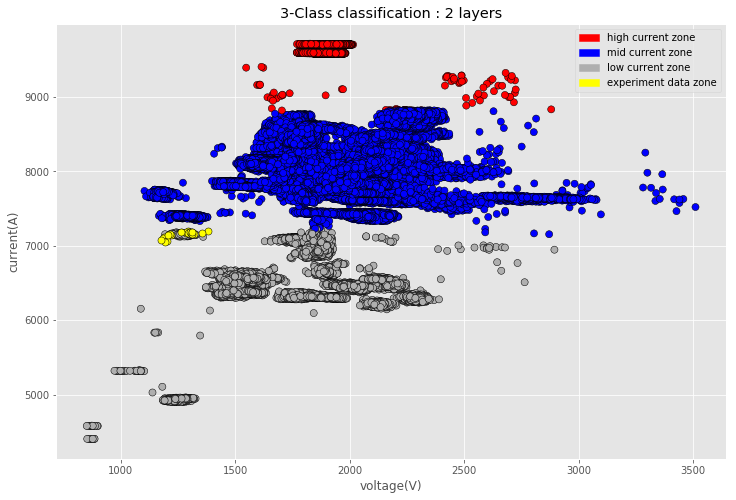

In [220]:
plt.figure(figsize=(12,8))
    
# Plot training points
plt.scatter(df_layer2['voltage'],df_layer2['current'], s=50,
            c=df_layer2['cluster'],cmap=cmap_bold,edgecolor = 'black')
plt.scatter(df_L2['voltage'],df_L2['current'], s=50,
            c='yellow',edgecolor = 'black')

patch0 = mpatches.Patch(color='#FF0000', label='high current zone')
patch1 = mpatches.Patch(color='#0000FF', label='mid current zone')
patch2 = mpatches.Patch(color='#AFAFAF', label='low current zone')
patch3 = mpatches.Patch(color='yellow', label='experiment data zone')
plt.legend(handles=[patch0,patch1,patch2,patch3])
    
plt.xlabel('voltage(V)')
plt.ylabel('current(A)')
plt.title('3-Class classification : 2 layers') 
plt.show()

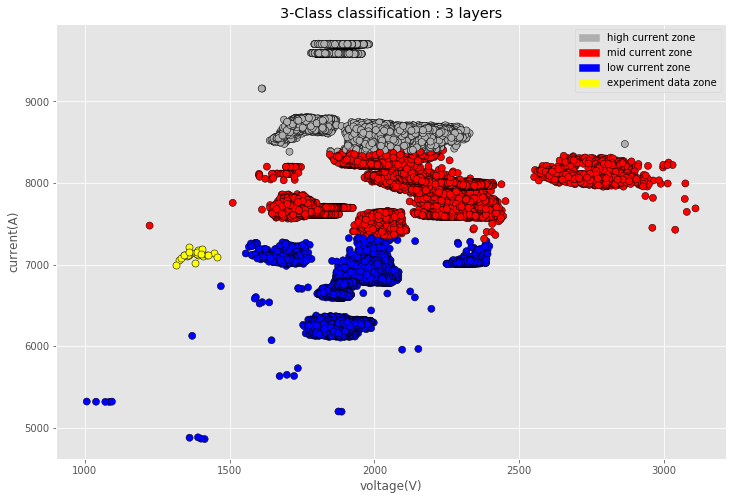

In [229]:
plt.figure(figsize=(12,8))
    
# Plot training points
plt.scatter(df_layer3['voltage'],df_layer3['current'], s=50,
            c=df_layer3['cluster'], cmap=cmap_bold, edgecolor = 'black')
plt.scatter(df_L3['voltage'],df_L3['current'], s=50,
            c='yellow',edgecolor = 'black')

patch0 = mpatches.Patch(color='#AFAFAF', label='high current zone')
patch1 = mpatches.Patch(color='#FF0000', label='mid current zone')
patch2 = mpatches.Patch(color='#0000FF', label='low current zone')
patch3 = mpatches.Patch(color='yellow', label='experiment data zone')
plt.legend(handles=[patch0,patch1,patch2,patch3])
    
plt.xlabel('voltage(V)')
plt.ylabel('current(A)')
plt.title('3-Class classification : 3 layers') 
plt.show()

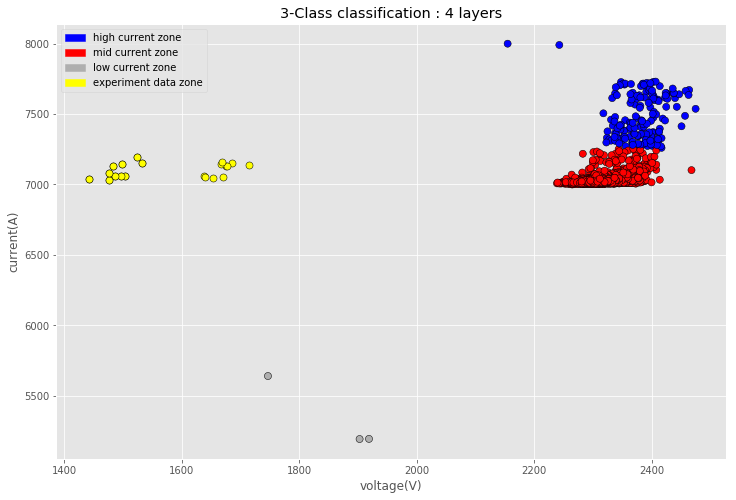

In [227]:
plt.figure(figsize=(12,8))
    
# Plot training points
plt.scatter(df_layer4['voltage'],df_layer4['current'], s=50,
            c=df_layer4['cluster'], cmap=cmap_bold, edgecolor = 'black')
plt.scatter(df_L4['voltage'],df_L4['current'], s=50,
            c='yellow',edgecolor = 'black')

patch0 = mpatches.Patch(color='#0000FF', label='high current zone')
patch1 = mpatches.Patch(color='#FF0000', label='mid current zone')
patch2 = mpatches.Patch(color='#AFAFAF', label='low current zone')
patch3 = mpatches.Patch(color='yellow', label='experiment data zone')
plt.legend(handles=[patch0,patch1,patch2,patch3])
    
plt.xlabel('voltage(V)')
plt.ylabel('current(A)')
plt.title('3-Class classification : 4 layers') 
plt.show()

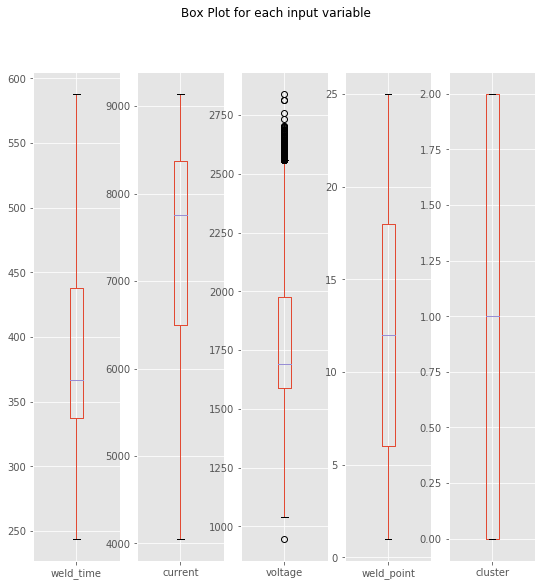

In [154]:
df_TC_112_11.plot(kind='box',subplots=True,sharex=False,sharey=False,
                  figsize=(9,9),title='Box Plot for each input variable')
plt.savefig('df_TC_112_1_boxplot')
plt.show()

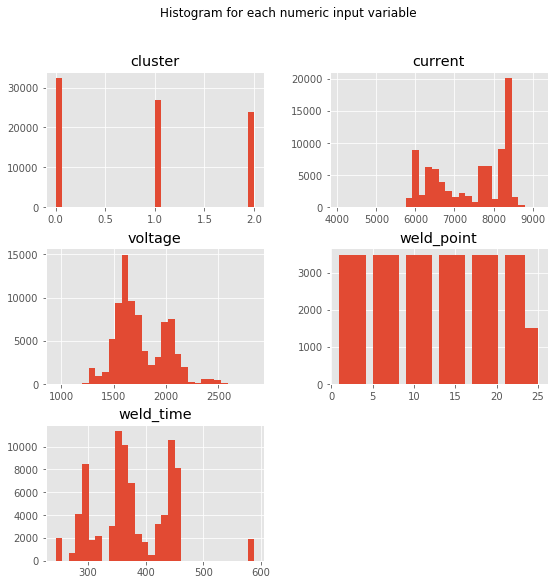

In [155]:
df_TC_112_11.hist(bins=30, figsize=(9,9))
plt.suptitle("Histogram for each numeric input variable")
plt.savefig('df_TC_112_1_hist')
plt.show()

In [156]:
import pandas.plotting
from pandas.plotting import scatter_matrix
from matplotlib import cm

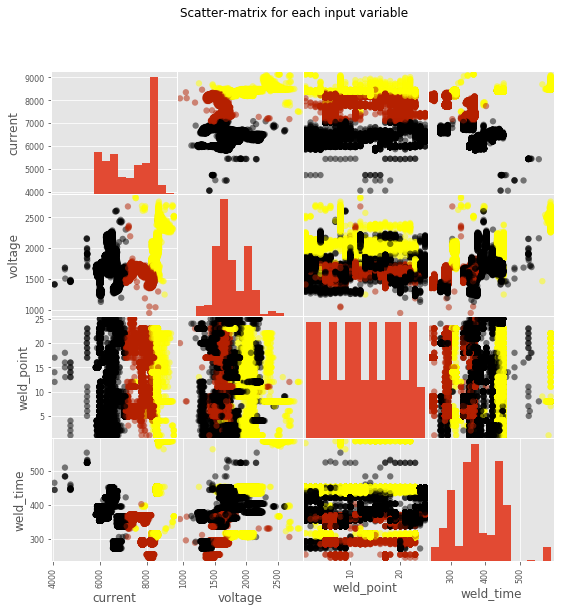

In [158]:
feature_names = ['current','voltage','weld_point','weld_time']
X = df_TC_112_11[feature_names]
y = df_TC_112_11['cluster']
cmap = cm.get_cmap('rainbow')

scatter = pandas.plotting.scatter_matrix(X,c = y,marker = 'o',s=40,hist_kwds={'bins':15},figsize=(9,9),cmap = cmap)

plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('result_scatter_matrix')

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [167]:
feature_names = ['current','voltage','weld_point','weld_time']
X = df_TC_112_11[feature_names]
y = df_TC_112_11['cluster']

In [168]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.



## Logistic Regression

In [169]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set:{:.2f}'.format(logreg.score(X_train,y_train)))
print('Accuracy of Logistic regression classifier on test set:{:.2f}'.format(logreg.score(X_test,y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



Accuracy of Logistic regression classifier on training set:0.98
Accuracy of Logistic regression classifier on test set:0.98


## K-NeighborsClassifier

In [173]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


## Linear Discriminant Analysis

In [175]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [176]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'.format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'.format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.98
Accuracy of LDA classifier on test set: 0.98


## Gaussian Naive Bayes

In [177]:
from sklearn.naive_bayes import GaussianNB

In [178]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.96
Accuracy of GNB classifier on test set: 0.97


## Support Vector Machine

In [179]:
from sklearn.svm import SVC

In [180]:
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 1.00


### KNN 분류기 테스트 예측치 정확도 검증

In [181]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [182]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[8132    8    0]
 [   8 6732    3]
 [   0    1 5872]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8140
           1       1.00      1.00      1.00      6743
           2       1.00      1.00      1.00      5873

   micro avg       1.00      1.00      1.00     20756
   macro avg       1.00      1.00      1.00     20756
weighted avg       1.00      1.00      1.00     20756



## Plot the Decision Boundary of the k-NN Classifier

In [183]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

In [184]:
feature_names = ['current','voltage','weld_point','weld_time']
X = df_TC_112_11[feature_names]
y = df_TC_112_11['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [236]:
X.shape

(83024, 4)

In [237]:
y.shape

(83024,)

In [238]:
X_mat = X[['voltage','current']].values
y_mat = y.values  

In [239]:
X_mat.shape

(83024, 2)

In [285]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF','#AFAFAF'])
cmap_bold  = ListedColormap(['#FF0000','#00FF00','#0000FF','#AFAFAF'])

In [279]:
n_neighbors = 5
weights = 'uniform'
clf = KNeighborsClassifier(n_neighbors,weights)

In [242]:
clf.fit(X_mat,y_mat)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [243]:
# Plot the decision boundary by assigning a color in the color map
# to each mesh point.
    
mesh_step_size = .01  # step size in the mesh
plot_symbol_size = 50

In [244]:
x_min, x_max = X_mat[:,0].min() - 1, X_mat[:,0].max() + 1
y_min, y_max = X_mat[:,1].min() - 1, X_mat[:,1].max() + 1

In [248]:
print(x_min,x_max)
print(y_min,y_max)

947 2841
4054 9140


In [249]:
xi = np.arange(x_min,x_max,mesh_step_size)
xi.shape

(189400,)

In [270]:
yi = np.arange(y_min,y_max,mesh_step_size)
yi.shape

(508600,)

In [271]:
xx, yy = np.meshgrid(xi,yi,sparse=True)

In [272]:
xx.shape

(1, 189400)

In [273]:
yy.shape

(508600, 1)

In [266]:
xx.ravel().shape

(189400,)

In [267]:
yy.ravel().shape

(508600,)

In [275]:
np.c_[xx.ravel(),yy.ravel()]

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [221]:
Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])

ValueError: all the input array dimensions except for the concatenation axis must match exactly

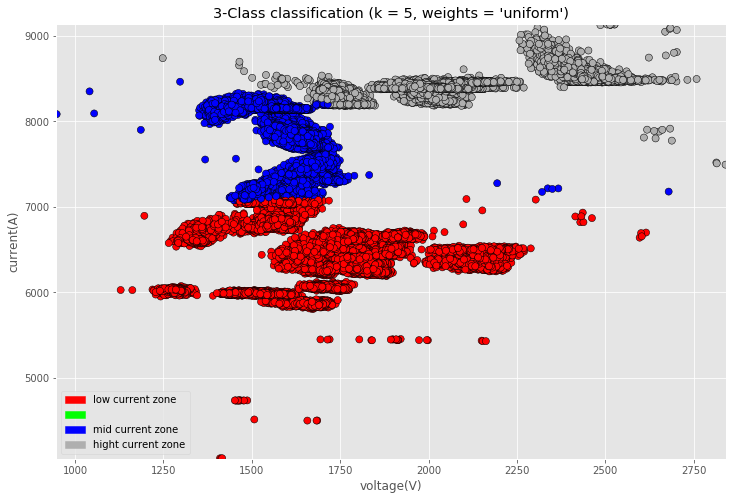

In [283]:
plt.figure(figsize=(12,8))
# plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
# Plot training points
plt.scatter(X_mat[:,0], X_mat[:,1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

patch0 = mpatches.Patch(color='#FF0000', label='low current zone')
# patch1 = mpatches.Patch(color='#00FF00', label='')
patch2 = mpatches.Patch(color='#0000FF', label='mid current zone')
patch3 = mpatches.Patch(color='#AFAFAF', label='hight current zone')
plt.legend(handles=[patch0, patch2, patch3])
    
plt.xlabel('voltage(V)')
plt.ylabel('current(A)')
plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors,weights)) 
plt.show()

In [197]:
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['voltage','current']].as_matrix()
    y_mat = y.values  # Create color maps
    cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000','#00FF00','#0000FF','#AFAFAF'])
    
    clf = KNeighborsClassifier(n_neighbors,weights=weights)
    clf.fit(X_mat,y_mat)
    
    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:,0].min() - 1, X_mat[:,0].max() + 1
    y_min, y_max = X_mat[:,1].min() - 1, X_mat[:,1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min,x_max,mesh_step_size),
                         np.arange(y_min,y_max,mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot training points
    plt.scatter(X_mat[:,0], X_mat[:,1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    
    plt.xlabel('voltage(V)')
    plt.ylabel('current(A)')
    plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors,weights)) 
    plt.show()

In [198]:
plot_fruit_knn(X_train,y_train,5,'uniform')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



MemoryError: 

In [159]:
to_model_columns = df_TC_112_1.columns[:3]

In [160]:
from sklearn.ensemble import IsolationForest

In [161]:
clf = IsolationForest(n_estimators=100, max_samples='auto',contamination=float(.12),
                      max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [162]:
clf.fit(df_TC_112_1[to_model_columns])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning:

behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.



IsolationForest(behaviour='old', bootstrap=False, contamination=0.12,
        max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
        random_state=42, verbose=0)

In [163]:
pred = clf.predict(df_TC_112_1[to_model_columns])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning:

threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.



In [164]:
df_TC_112_1['anomaly'] = pred
df_TC_112_1.head()

index  weld_time  current  voltage  weld_point robot_name  cluster  \
0      0        434     8403     2059           1   TC_112_1        2   
1      1        453     8380     2030           2   TC_112_1        2   
2      2        453     8390     2041           3   TC_112_1        2   
3      3        451     8382     2003           4   TC_112_1        2   
4      4        288     8154     1524           5   TC_112_1        1   

            c1          c2  anomaly  
0 -1016.902043  193.422352        1  
1  -990.947624  172.243422        1  
2 -1002.134675  181.755361        1  
3  -989.839083  145.438482        1  
4  -707.096391 -328.972915       -1

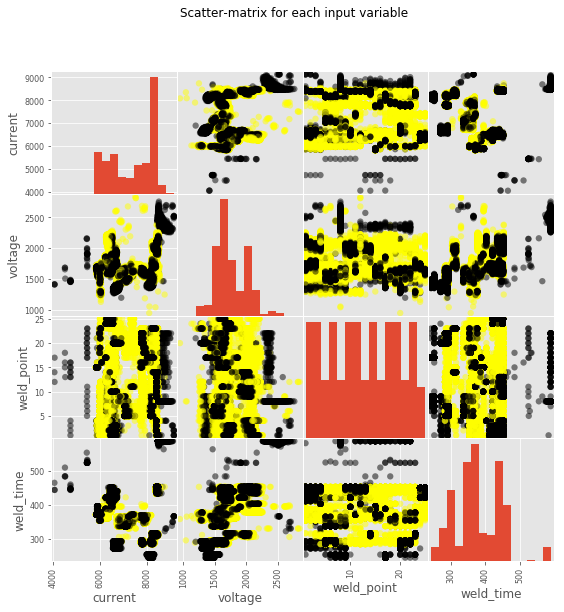

In [165]:
feature_names = ['current','voltage','weld_point','weld_time']
X = df_TC_112_1[feature_names]
y = df_TC_112_1['anomaly']
cmap = cm.get_cmap('gnuplot')

scatter = pandas.plotting.scatter_matrix(X,c = y,marker = 'o',s=40,hist_kwds={'bins':15},figsize=(9,9),cmap = cmap)

plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('result_scatter_matrix')

In [58]:
outliers = df_TC_112_1.loc[df_TC_112_1['anomaly'] == -1]

In [59]:
outlier_index = list(outliers.index)
# print(outlier_index)
# Find the number of anomalies and normal points here points classified -1 are anomalous
print(df_TC_112_1['anomaly'].value_counts())

 1    73061
-1     9963
Name: anomaly, dtype: int64


    Now here we have 102 welding robots on which we have classified anomalies based on isolation forest.
    We will try to visualize the results and check if the classification makes sense.
    Normalize and fit the robots to a PCA to reduce the number of dimensions 
    and then plot them in 3D highlighting the anomalies.

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [66]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions

In [67]:
scaler = StandardScaler()
# normalize the robots
X = scaler.fit_transform(df_TC_112_1[to_model_columns])
X_reduce = pca.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.



In [69]:
X

array([[-1.72097992,  0.85939096,  1.07565949],
       [-1.72093882,  1.14689184,  1.05062806],
       [-1.72089772,  1.14689184,  1.06151129],
       ...,
       [ 1.72707838, -0.35113903, -1.5036659 ],
       [ 1.72711949,  1.10149696, -1.02371548],
       [ 1.72716059,  0.81399609, -1.07269001]])

In [70]:
X_reduce

array([[ 2.09304841,  0.40004433,  0.5625664 ],
       [ 2.12725952,  0.67899807,  0.62812356],
       [ 2.13491625,  0.67889998,  0.62038979],
       ...,
       [-2.30767232,  0.09839089, -0.17910113],
       [-1.70649283,  1.50177277, -0.27711266],
       [-1.79301737,  1.22357481, -0.29032842]])

In [68]:
ig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel('x_composite_3')

# Plot the compressed data points
ax.scatter(X_reduce[:,0],X_reduce[:,1],zs=X_reduce[:,2],s=4,lw=1,label='inliers',c='green')

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1],X_reduce[outlier_index,2],
           lw=2,s=60,marker='x', c='red', label='outliers')
ax.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



<Figure size 864x576 with 0 Axes>

    Now as we see the 3D point the anomaly points are mostly wide from the cluster of normal points,
    but a 2D point will help us to even judge better.
    Lets try plotting the same fed to a PCA reduced to 2 dimensions.

In [72]:
pca = PCA(2)

In [73]:
pca.fit(df_TC_112_1[to_model_columns])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [74]:
res = pd.DataFrame(pca.transform(df_TC_112_1[to_model_columns]))

In [75]:
res.head()

0           1
0 -41880.945943 -212.114271
1 -41879.519748 -189.358431
2 -41878.705427 -199.374589
3 -41877.557162 -191.371883
4 -41872.325195   38.443343

In [76]:
Z = np.array(res)

In [77]:
Z

array([[-41880.94594324,   -212.11427077],
       [-41879.51974794,   -189.35843101],
       [-41878.70542741,   -199.37458892],
       ...,
       [ 42036.58513177,    602.15039437],
       [ 42029.40257008,    160.12518937],
       [ 42031.23748086,    205.31598625]])

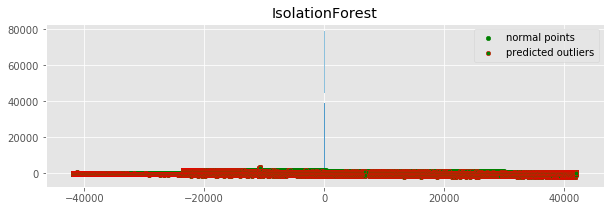

In [80]:
fig = plt.figure(figsize=(10,3))
plt.title('IsolationForest')

plt.contourf(Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1],c='green',s=20,label='normal points')
b1 = plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1],c='green',s=20,
                 edgecolor='red',label='predicted outliers')

plt.legend(loc='upper right')
plt.show()

    참고: 시계열 데이터일 경우 outlier 그래프상에 표현

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
def plot_anomaly(df,metric_name):
    df.load_date = pd.to_datetime(df['load_date'].astype(str), format="%Y%m%d")
    dates = df.load_date
    #identify the anomaly points and create a array of its values for plot
    bool_array = (abs(df['anomaly']) > 0)
    actuals = df["actuals"][-len(bool_array):]
    anomaly_points = bool_array * actuals
    anomaly_points[anomaly_points == 0] = np.nan
    #A dictionary for conditional format table based on anomaly
    color_map = {0: "'rgba(228, 222, 249, 0.65)'", 1: "yellow", 2: "red"}
    
    #Table which includes Date,Actuals,Change occured from previous point
    table = go.Table(
        domain=dict(x=[0, 1],
                    y=[0, 0.3]),
        columnwidth=[1, 2],
        # columnorder=[0, 1, 2,],
        header=dict(height=20,
                    values=[['<b>Date</b>'], ['<b>Actual Values </b>'], ['<b>% Change </b>'],
                            ],
                    font=dict(color=['rgb(45, 45, 45)'] * 5, size=14),
                    fill=dict(color='#d562be')),
        cells=dict(values=[df.round(3)[k].tolist() for k in ['load_date', 'actuals', 'percentage_change']],
                   line=dict(color='#506784'),
                   align=['center'] * 5,
                   font=dict(color=['rgb(40, 40, 40)'] * 5, size=12),
                   # format = [None] + [",.4f"] + [',.4f'],
                   # suffix=[None] * 4,
                   suffix=[None] + [''] + [''] + ['%'] + [''],
                   height=27,
                   fill=dict(color=[test_df['anomaly_class'].map(color_map)],#map based on anomaly level from dictionary
                   )
                   ))
    #Plot the actuals points
    Actuals = go.Scatter(name='Actuals',
                         x=dates,
                         y=df['actuals'],
                         xaxis='x1', yaxis='y1',
                         mode='line',
                         marker=dict(size=12,
                                     line=dict(width=1),
                                     color="blue"))
#Highlight the anomaly points
    anomalies_map = go.Scatter(name="Anomaly",
                               showlegend=True,
                               x=dates,
                               y=anomaly_points,
                               mode='markers',
                               xaxis='x1',
                               yaxis='y1',
                               marker=dict(color="red",
                                           size=11,
                                           line=dict(
                                               color="red",
                                               width=2)))
axis = dict(
        showline=True,
        zeroline=False,
        showgrid=True,
        mirror=True,
        ticklen=4,
        gridcolor='#ffffff',
        tickfont=dict(size=10))
layout = dict(
        width=1000,
        height=865,
        autosize=False,
        title=metric_name,
        margin=dict(t=75),
        showlegend=True,
        xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1', showticklabels=True)),
        yaxis1=dict(axis, **dict(domain=[2 * 0.21 + 0.20, 1], anchor='x1', hoverformat='.2f')))
fig = go.Figure(data=[table, anomalies_map, Actuals], layout=layout)
iplot(fig)
pyplot.show()

In [ ]:
def classify_anomalies(df,metric_name):
    df['metric_name']=metric_name
    df = df.sort_values(by='load_date', ascending=False)
    #Shift actuals by one timestamp to find the percentage chage between current and previous data point
    df['shift'] = df['actuals'].shift(-1)
    df['percentage_change'] = ((df['actuals'] - df['shift']) / df['actuals']) * 100
    #Categorise anomalies as 0-no anomaly, 1- low anomaly , 2 - high anomaly
    df['anomaly'].loc[df['anomaly'] == 1] = 0
    df['anomaly'].loc[df['anomaly'] == -1] = 2
    df['anomaly_class'] = df['anomaly']
    max_anomaly_score = df['score'].loc[df['anomaly_class'] == 2].max()
    medium_percentile = df['score'].quantile(0.24)
    df['anomaly_class'].loc[(df['score'] > max_anomaly_score) & (df['score'] <= medium_percentile)] = 1
    return df

In [ ]:
import warnings  
warnings.filterwarnings('ignore')
for i in range(1,len(metrics_df.columns)-1):
    clf.fit(metrics_df.iloc[:,i:i+1])
    pred = clf.predict(metrics_df.iloc[:,i:i+1])
    test_df=pd.DataFrame()
    test_df['load_date']=metrics_df['load_date']
    #Find decision function to find the score and classify anomalies
    test_df['score']=clf.decision_function(metrics_df.iloc[:,i:i+1])
    test_df['actuals']=metrics_df.iloc[:,i:i+1]
    test_df['anomaly']=pred
    #Get the indexes of outliers in order to compare the metrics     with use case anomalies if required
    outliers=test_df.loc[test_df['anomaly']==-1]
    outlier_index=list(outliers.index)
    test_df=classify_anomalies(test_df,metrics_df.columns[i])
    plot_anomaly(test_df,metrics_df.columns[i])


https://miro.medium.com/max/1166/1*6V6nnv_mgDpk7KGdA5QJfQ.png